# 해설 강의
- 드릴다운
- 카운트 로그화 시켜서 파생변수 만들기
- 윈드스피드 20넘는것들 평균으로 치환함
-

In [156]:
import os as os

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

# 나눔고딕 경로 찾기 (macOS 기준)
font_path = fm.findfont("NanumGothic")
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트와 마이너스 기호 깨짐 방지 설정
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

In [157]:
os.getcwd()

'/Users/yoonwogud/Desktop/codeit_ds/Part1'

In [158]:
train_path = './csv_dir/train_mission3.csv'
test_path = './csv_dir/test_mission3'
df = pd.read_csv(train_path)

# 결측치 확인

<Axes: >

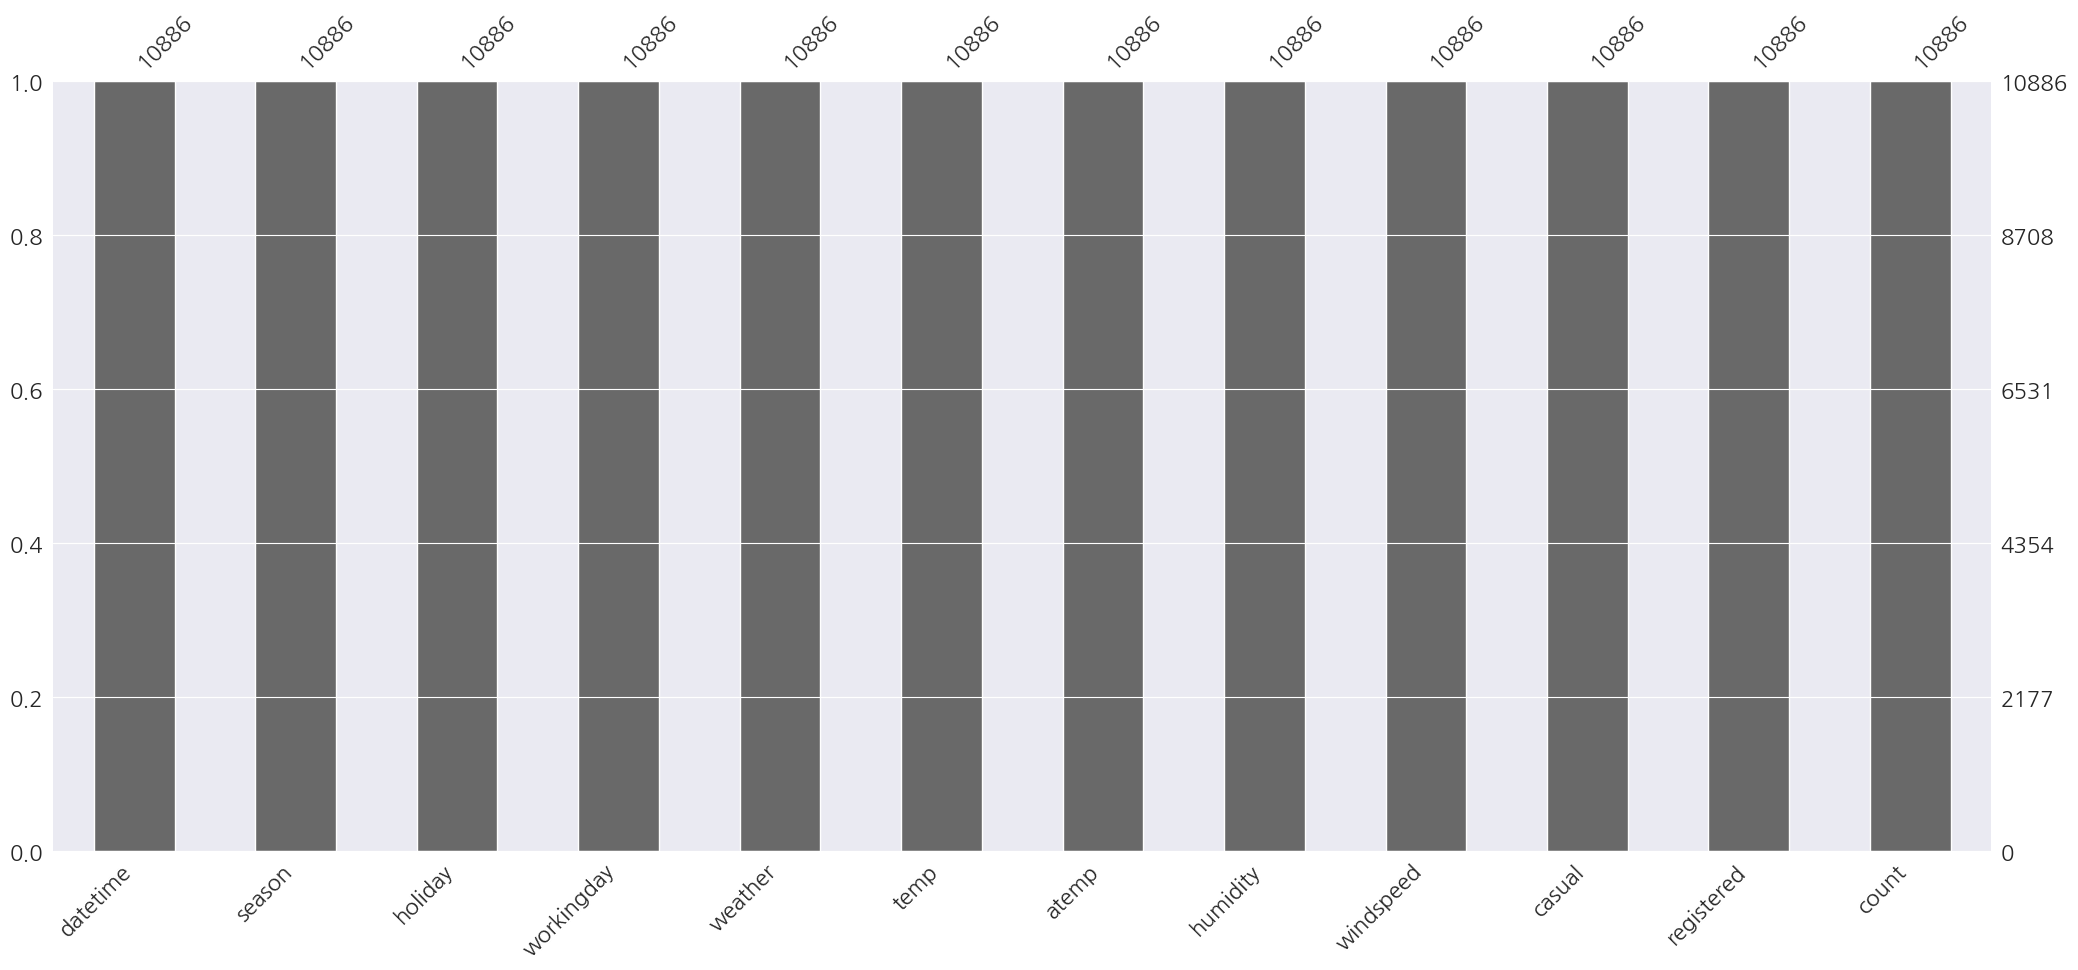

In [159]:
msno.bar(df)

# 중복값 확인

In [160]:
df.duplicated().sum()

np.int64(0)

In [161]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [163]:
# 데이트타임 확인하고 시간, 달 컬럼 추가함
df['datetime'].dtype # 0
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].dtype # <M8[ns]


df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday

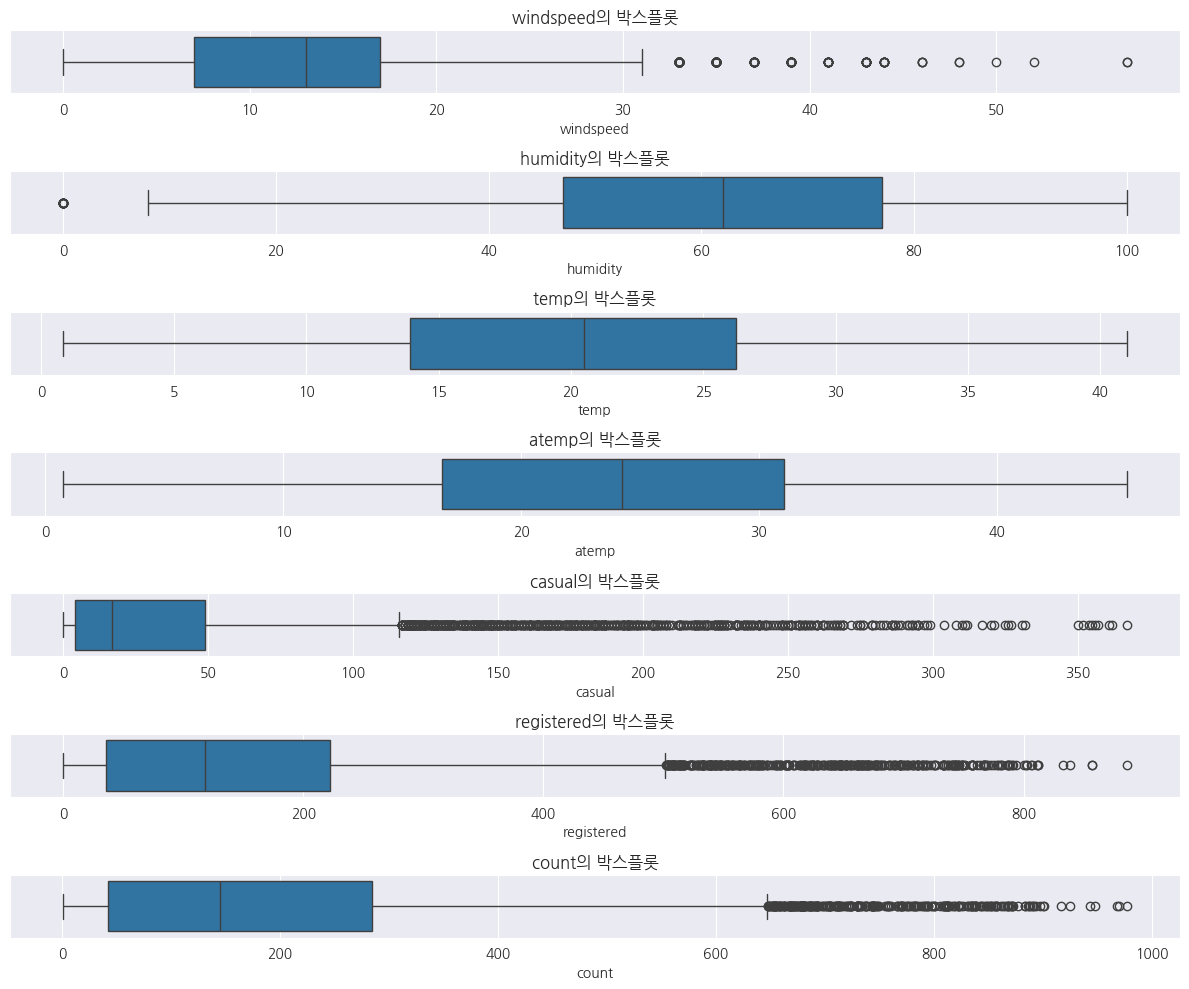

In [164]:
# 실수인 애들만 박스플롯 ㅐㅎ보기
continuous_X_arr = ['windspeed', 'humidity', 'temp', 'atemp', 'casual', 'registered', 'count']

plt.figure(figsize=(12,10))
for i, _ in enumerate(continuous_X_arr, start=1):
    plt.subplot(7,1,i)
    plt.title(f"{_}의 박스플롯")
    sns.boxplot(data = df, x = _)

plt.tight_layout()
plt.show()

#풍속, 습도, 사용자 이상함

In [165]:
df[['month','hour','windspeed', 'humidity', 'temp', 'atemp','count']].sort_values(by=['count'], ascending=False)


,month,hour,windspeed,humidity,temp,atemp,count
9345,9,18,16.9979,44,27.06,31.060,977
9320,9,17,0.0000,28,28.70,31.820,970
9297,9,18,19.9995,35,25.42,31.060,968
9752,10,17,15.0013,43,23.78,27.275,948
9896,10,17,12.9980,39,21.32,25.000,943
...,...,...,...,...,...,...,...
905,3,4,8.9981,75,8.20,10.605,1
1853,5,3,35.0008,88,17.22,21.210,1
1589,4,3,8.9981,56,23.78,27.275,1
693,2,5,6.0032,74,4.92,8.335,1


# 습도 확인하기
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- 0이 이상치. 습도 0은 불가능. 평균으로 대체함
https://www.kosha.or.kr/kosha/business/heatWaveTemperature.do # 열지수 위험도 표
https://www.weather.gov/ama/heatindex 신체에 미치는 영향


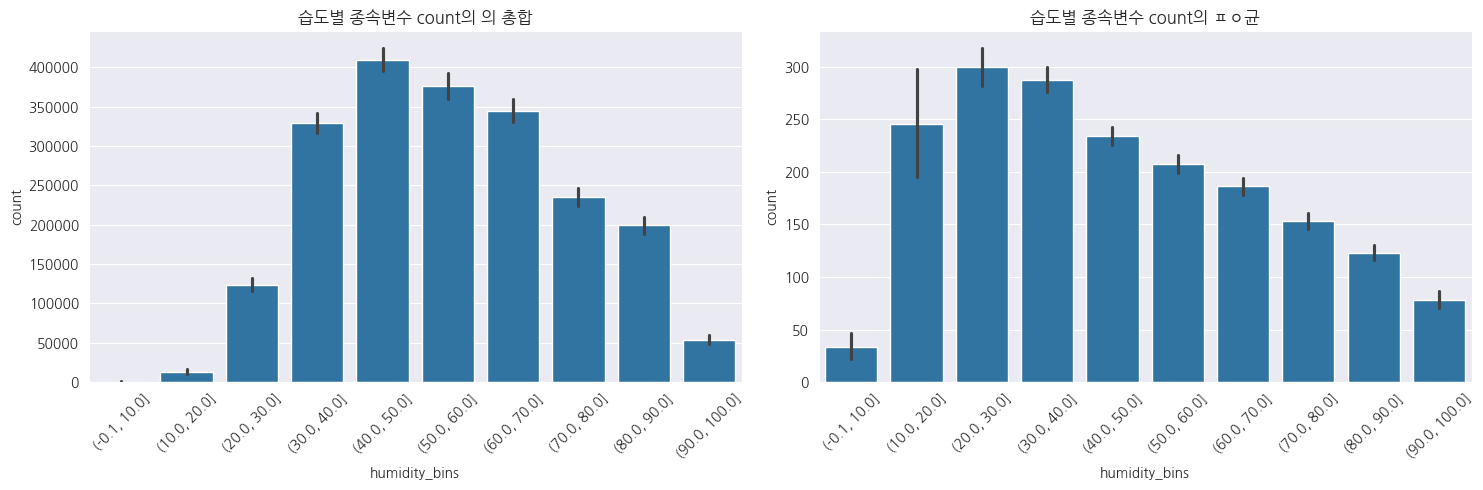

In [166]:
df['humidity_bins'] = pd.cut(df['humidity'], bins=10) #10단위로 나눠서 보자
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

plt.title("습도별 종속변수 count의 의 총합")
sns.barplot(data = df, x = 'humidity_bins', y = 'count', estimator=np.sum)# 그룹바이로 묶어서 sum 써서 바플롯 그려도됨
plt.xticks(rotation=45)


plt.subplot(1,2,2)
plt.title("습도별 종속변수 count의 ㅍㅇ균")
sns.barplot(data =df, x = 'humidity_bins', y = 'count', estimator=np.mean)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [167]:
df['humidity'].value_counts()
# 0이 22개있음. 평균으로 맞춰도될듯

# 이러면 0-포함한 평균
# df['humidity'] = df['humidity'].replace(0,df['humidity'].mean())

# 0을 제외한 것의 평균
no_zero = df.loc[df['humidity'] != 0, 'humidity'].mean()
df['humidity'] = df['humidity'].replace(0, no_zero)
df['humidity'].value_counts()


humidity
88.0    368
94.0    324
83.0    316
87.0    289
70.0    259
       ... 
8.0       1
10.0      1
97.0      1
96.0      1
91.0      1
Name: count, Length: 89, dtype: int64

# 미등록 사용자 대여수 + 등록 사용자 대여수 = 총 대여수가 맞아야함

In [168]:
df[((df['casual'] + df['registered']) != df['count'])]
# 다맞음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,weekday,humidity_bins


# 풍속 처리
- 31부터는 이상치로 간주함
- 75퍼부터는 **초속 13** 넘으면 걷기가 힘듦
 - 해안가인가...?. 자전거 타면서 둘러보느 ㄴ곳
- 75퍼센트인 대체하기로함. 3400개임. 삭제하기엔 너무 많다.
- 평균이랑 중앙값 또이또이함. 12~ 13
- 풍속(9) = 잔물결 발생, 가지 흔들림
- 최빈값(9)으로 대체함. 12~ 13도 쎈거같음.
- 나머지를 다 최빈값으로 해도되나...
-  풍속 9가 1120 -> 5761 개됨.... 에반데
-  아니 풍속 20 이상은 걍 태풍인데 자전거 타는 게 말이안됨. 다 없앨까. 3400갠데...음
- 9를 좀 나눠서 넣어야되는데. 랜덤하면 안될거같고...비슷한거 묶어서 평균내는게 나을듯 중앙이나
- 9 넣는게 점수 더 좋게나옴...

In [169]:
# import numpy as np
#
# # 0이랑 13이상만
# df['windspeed'] = df['windspeed'].astype(float)
# df.loc[df['windspeed'] == 0, 'windspeed'] = np.nan
# df.loc[df['windspeed'] >= 13 , 'windspeed'] = np.nan
#
# # 묶어서 평균냄
# df['windspeed'] = df['windspeed'].fillna(
#     df.groupby(['season','weather','hour'])['windspeed'].transform('mean'))
#
# # 그룹 혼자 잇는거 고려
# df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())

df['windspeed'] = df['windspeed'].astype(float)
df.loc[df['windspeed'] == 0, 'windspeed'] = np.nan
df.loc[df['windspeed'] >= 15, 'windspeed'] = np.nan

# 최빈값 9로 대체
df['windspeed'] = df['windspeed'].fillna(9)

In [170]:
df['windspeed'].value_counts()

windspeed
9.0000     5761
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
6.0032      872
Name: count, dtype: int64

# Weather 처리
- 문제 없음

In [171]:
print(df['weather'].value_counts())
print("\n")
df[df['weather'] == 4]
# 1월 18시에 8도면 폭우일듯
# 날씨 상황 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설)

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64




,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,weekday,humidity_bins
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86.0,6.0032,6,158,164,18,1,9,0,"(80.0, 90.0]"


Text(0, 0.5, 'count')

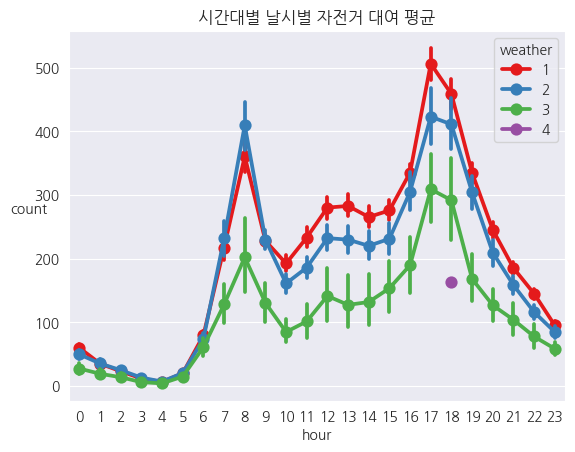

In [172]:
plt.title("시간대별 날시별 자전거 대여 평균")
sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'weather', palette='Set1')
plt.ylabel("count",rotation=0)
# 날씨 상황 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설)
#날씨가 좋으면 좀 늘어남

In [173]:
df[(df['humidity'] >= 40) & (df['temp'] >=37)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,weekday,humidity_bins
2416,2011-06-08 14:00:00,2,0,1,1,37.72,43.940,40.0,9.0000,44,111,155,14,6,8,2,"(30.0, 40.0]"
2417,2011-06-08 15:00:00,2,0,1,1,37.72,43.940,40.0,11.0014,28,100,128,15,6,8,2,"(30.0, 40.0]"
2418,2011-06-08 16:00:00,2,0,1,1,37.72,43.940,40.0,9.0000,34,199,233,16,6,8,2,"(30.0, 40.0]"
2440,2011-06-09 14:00:00,2,0,1,1,37.72,43.940,40.0,12.9980,25,93,118,14,6,9,3,"(30.0, 40.0]"
8330,2012-07-08 11:00:00,3,0,0,1,37.72,44.695,42.0,9.0000,120,269,389,11,7,8,6,"(40.0, 50.0]"
8331,2012-07-08 12:00:00,3,0,0,1,37.72,44.695,42.0,12.9980,105,271,376,12,7,8,6,"(40.0, 50.0]"
8334,2012-07-08 15:00:00,3,0,0,3,37.72,44.695,42.0,9.0000,80,218,298,15,7,8,6,"(40.0, 50.0]"


# Temp
- 계절이 우리나라랑 다른 거 같음
- 123 봄, 456 여름, 789 가을, 10 11 12 겨울로 되어있는데
- 계절로 나눠서 보지말고 월로만 나누기
- 월별로 보니깐 1년 내내 더운듯
- 시간, 월 컬럼 추가함

In [174]:
a = df[df['season'] == 2] # 여름이 가을보다 온도가 더 낮음...
a['temp'].describe()# 그럼 그냥 계절

count    2733.000000
mean       22.823483
std         5.159616
min         9.840000
25%        18.860000
50%        22.960000
75%        26.240000
max        38.540000
Name: temp, dtype: float64

1월 23.78
2월 27.06
3월 29.52
4월 32.8
5월 31.16
6월 38.54
7월 41.0
8월 37.72
9월 35.26
10월 30.34
11월 26.24
12월 24.6


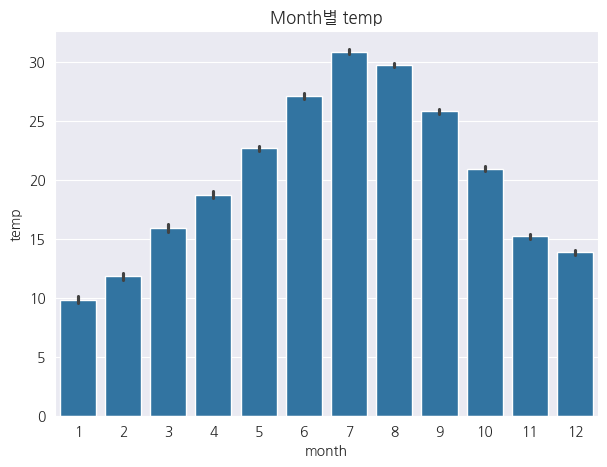

In [175]:
# 월별 기온 보기
for mon_i in range(1,13):
    print(f"{mon_i}월",df[df['month'] == mon_i]['temp'].max())

plt.figure(figsize=(7,5))
plt.title("Month별 temp")
sns.barplot(data = df, x = 'month', y = 'temp')



plt.show()

# Month, Day, HOur로 나눠서보기
- 6,7,8,9,10월이 좀 높음
- 일자별로는 별 차이 없음
- 8시 출근, 18시 퇴근 시간에 좀 높은 거 같음

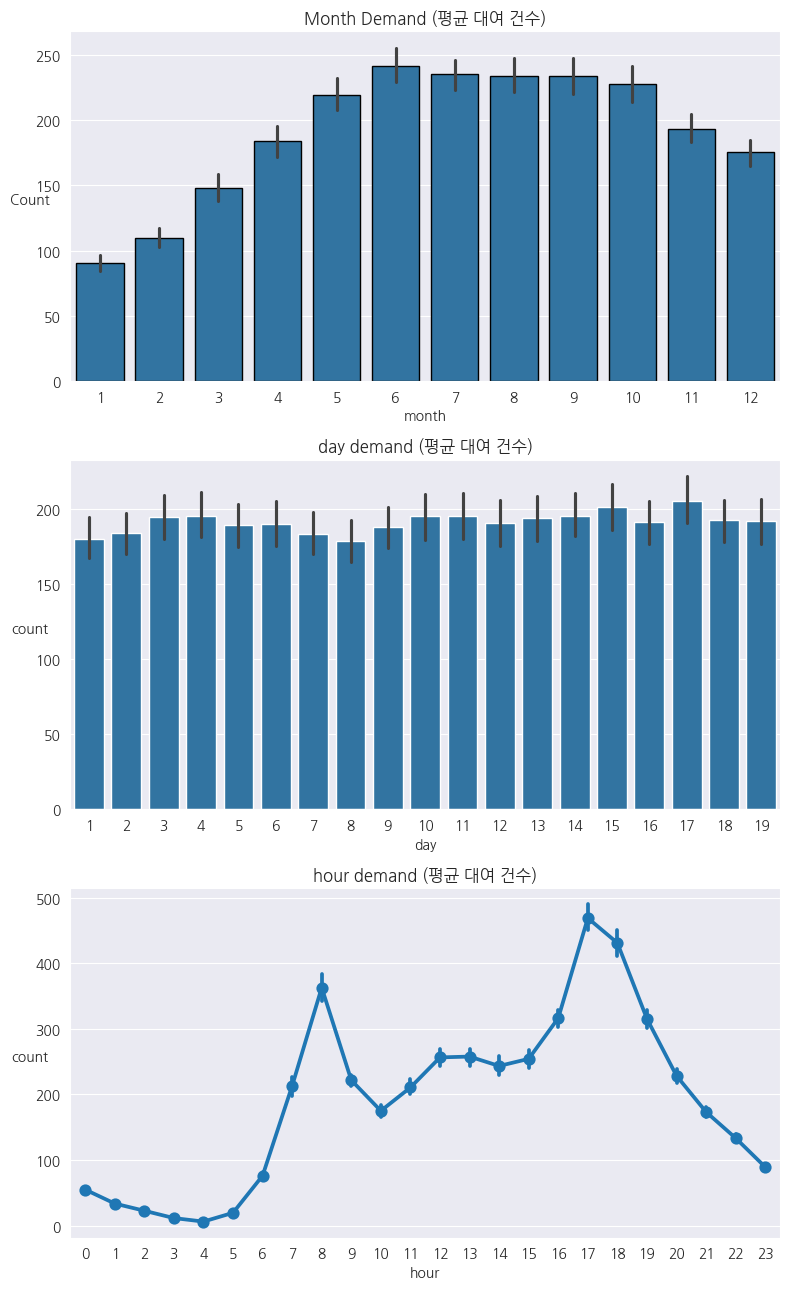

In [176]:
plt.figure(figsize=(8,13))

plt.subplot(3,1,1)
plt.title("Month Demand (평균 대여 건수)")
sns.barplot(data=df, x='month', y='count', edgecolor='black')
plt.ylabel("Count", rotation=0)



plt.subplot(3,1,2)
plt.title("day demand (평균 대여 건수)")
sns.barplot(data = df, x = 'day', y = 'count')
plt.ylabel("count", rotation=0)


plt.subplot(3,1,3)
plt.title("hour demand (평균 대여 건수)")
sns.pointplot(data = df, x = 'hour', y = 'count')
plt.ylabel("count", rotation=0)


plt.tight_layout()
plt.show()

# 공휴일, 워킹데이
- 워킹데이(1)이라면 근무일 이니깐 대여수 올라감, 8시 18시에, 영향 있을 듯

In [177]:
# 공휴일이면 쉬어야됨. 근무일인 경우 없음
df[(df['holiday'] == 1) & (df['workingday'] == 1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,weekday,humidity_bins


In [178]:
# 빨간날 / 평일0, 주말1
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [179]:
df['workingday'].value_counts()
# 실제 사람들이 일하러 가는 날 주말,공휴일0   근무일 1

workingday
1    7412
0    3474
Name: count, dtype: int64

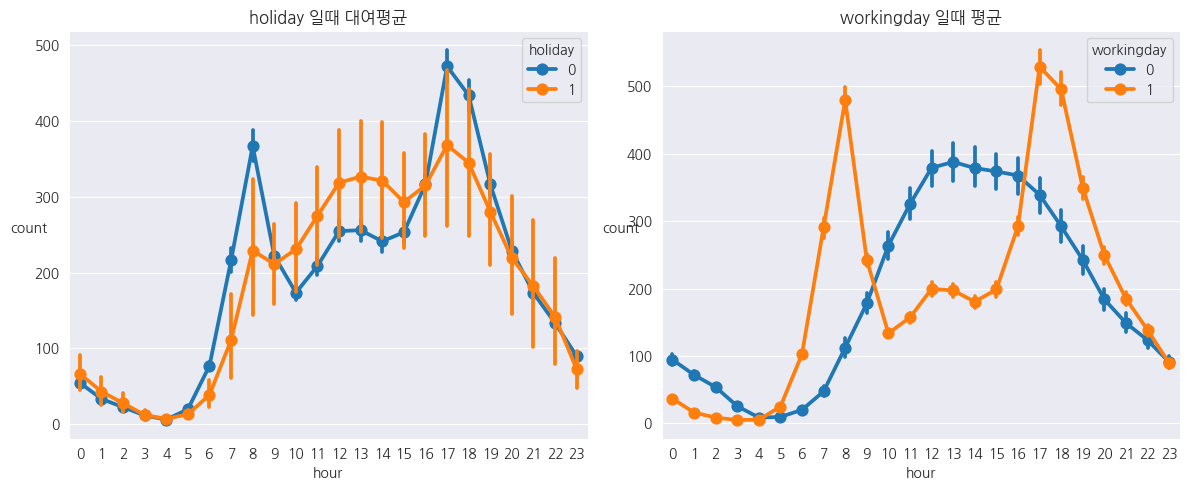

In [180]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.title("holiday 일때 대여평균")
sns.pointplot(data = df, x = 'hour' ,y = 'count', hue = 'holiday')
plt.ylabel("count", rotation=0)
# holiday가 0이면 평일 1이면 공휴일

plt.subplot(1,2,2)
plt.title("workingday 일때 평균")
sns.pointplot(data = df, x = 'hour' ,y = 'count', hue = 'workingday')
# workingday (0: 주말/공휴일, 1: 근무일)
plt.ylabel("count", rotation=0)


plt.tight_layout()
plt.show()

#할리데이랑 워킹데이랑 너무 겹침 다중공선성

## 월별, 온도로 묶어서 보기
- 온도가 높을 수록 대여 수가 높아짐

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_90480/1415792689.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['month']==i], x='temp_bins', y='count', palette=palette, edgecolor='black')
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_90480/1415792689.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['month']==i], x='temp_bins', y='count', palette=palette, edgecolor='black')
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_90480/1415792689.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



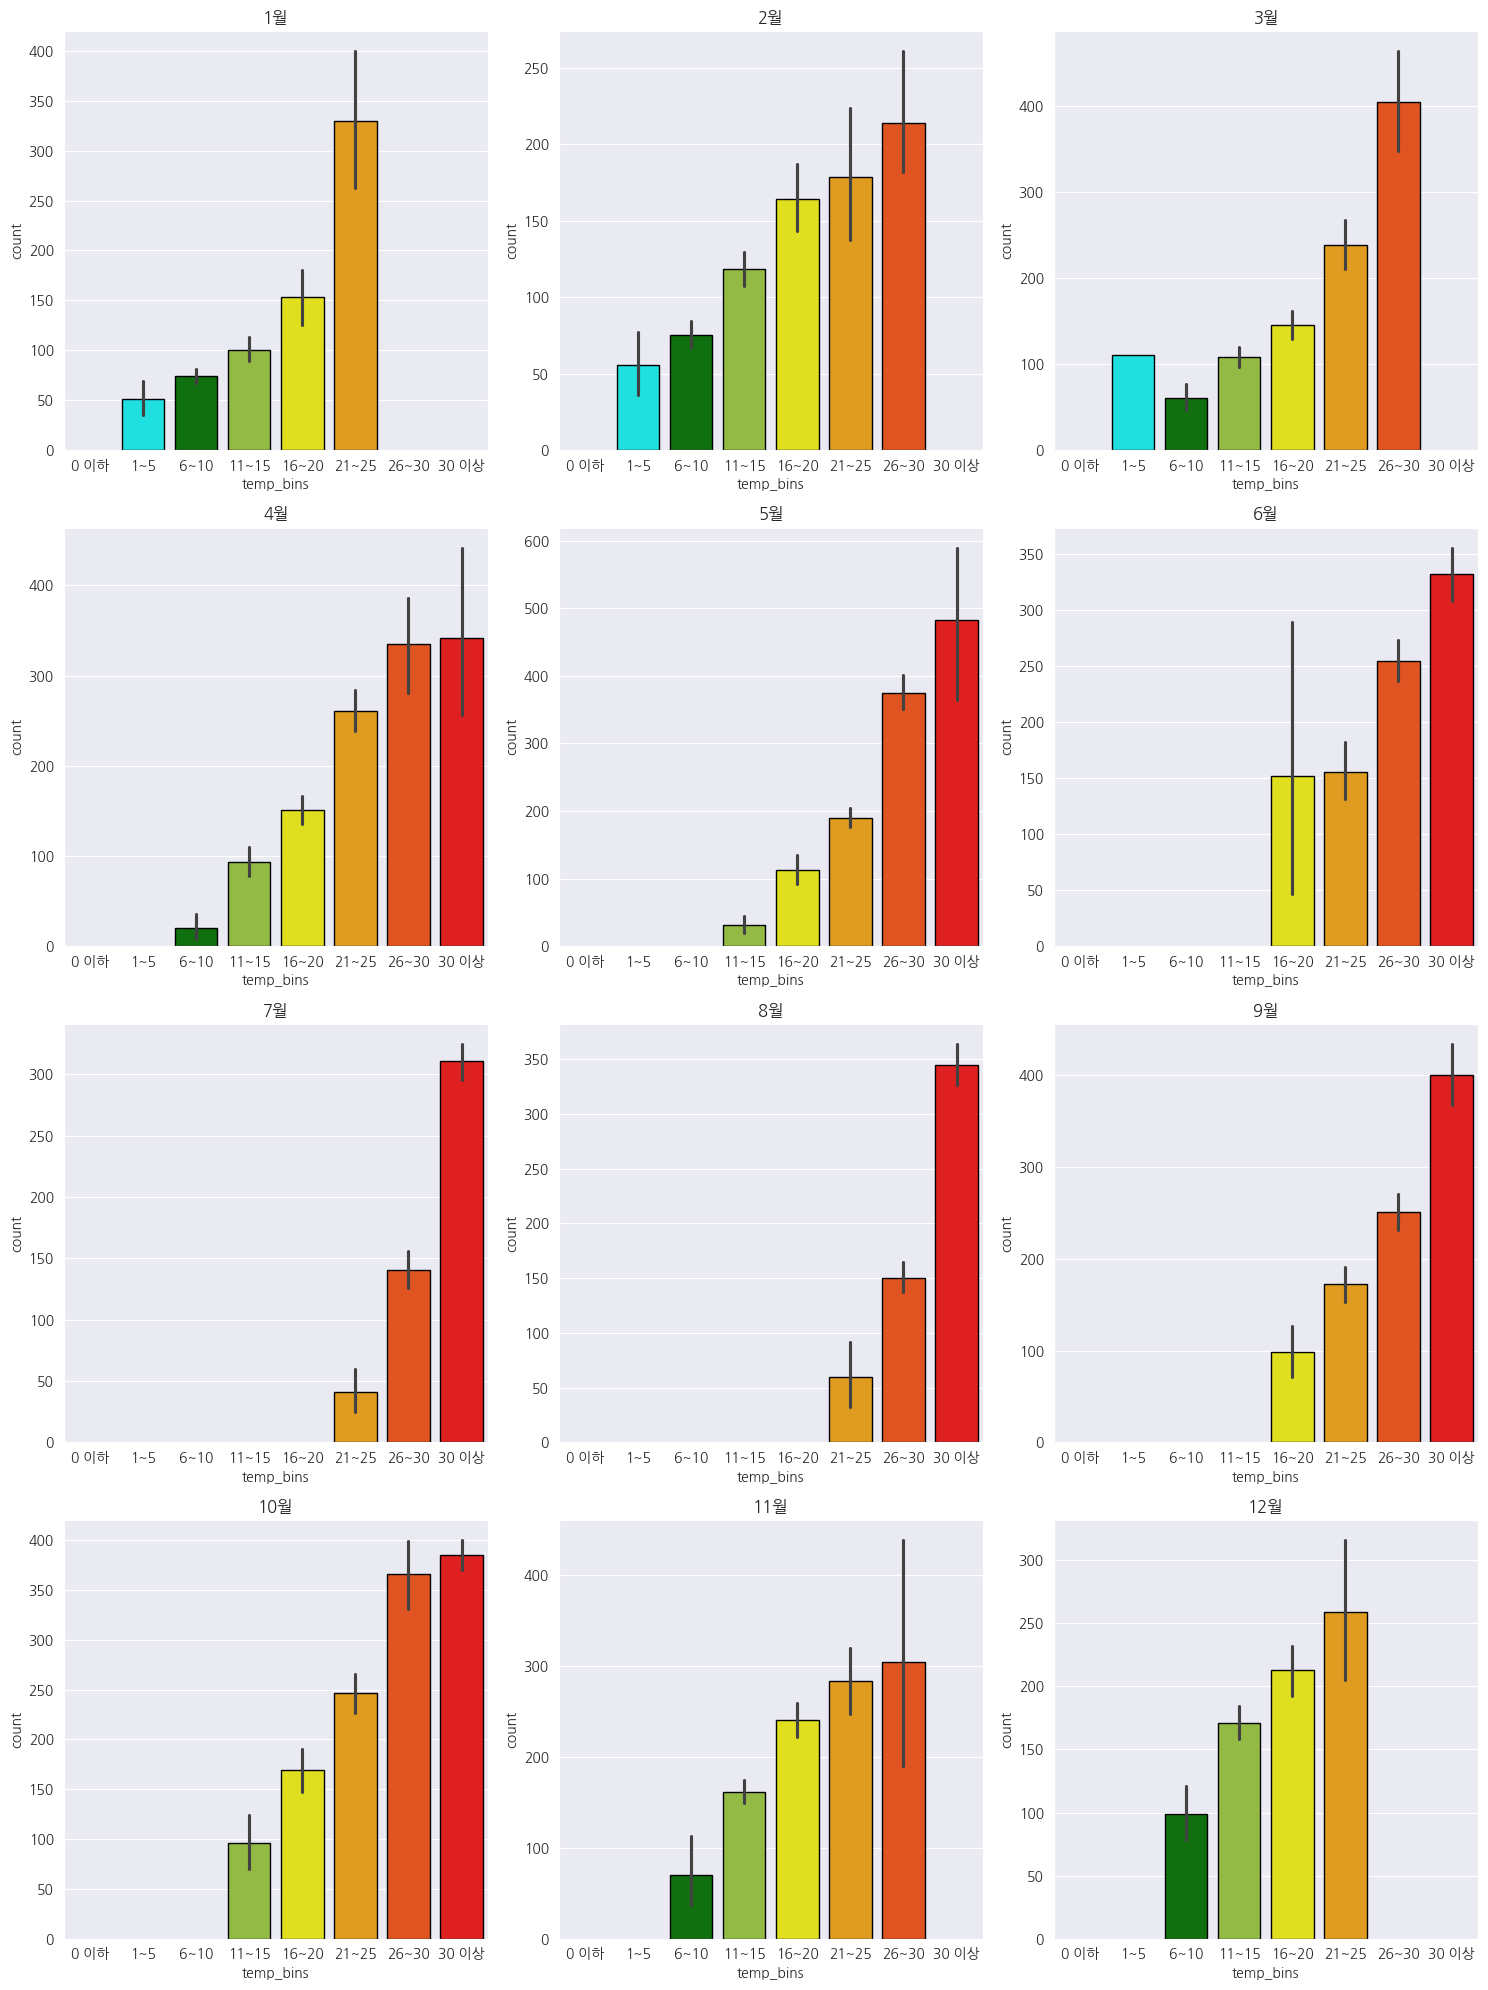

In [181]:
plt.figure(figsize=(15, 20))

# 온도를 빈스로 나눔
temp_bins_arr = [-float('inf'), 0, 5, 10, 15, 20, 25, 30, float('inf')]
temp_labels = ["0 이하", "1~5", "6~10", "11~15", "16~20", "21~25", "26~30", "30 이상"]

palette = {
    "0 이하": "blue",
    "1~5": "cyan",
    "6~10": "green",
    "11~15": "yellowgreen",
    "16~20": "yellow",
    "21~25": "orange",
    "26~30": "orangered",
    "30 이상": "red"
}

df['temp_bins'] = pd.cut(df['temp'], bins=temp_bins_arr, labels=temp_labels)

# 봄



for i, mon in enumerate(range(1,13), start=1):
    plt.subplot(4, 3, i)
    plt.title(f"{i}월")
    sns.barplot(data=df[df['month']==i], x='temp_bins', y='count', palette=palette, edgecolor='black')


plt.tight_layout()
plt.show()

# 수치형 상관관계 파악
- 시즌은 월별로 묶여있으니 원핫 인코딩시키기
- 공휴일, 워킹데이도 순서형 원핫 인코딩
- 웨더 원핫 인코딩 시키기
- 템프, 어템프는 그대로 넣기
- 습도 넣기
- 캐쥬얼, 등록, 총사용자는 드롭시키기

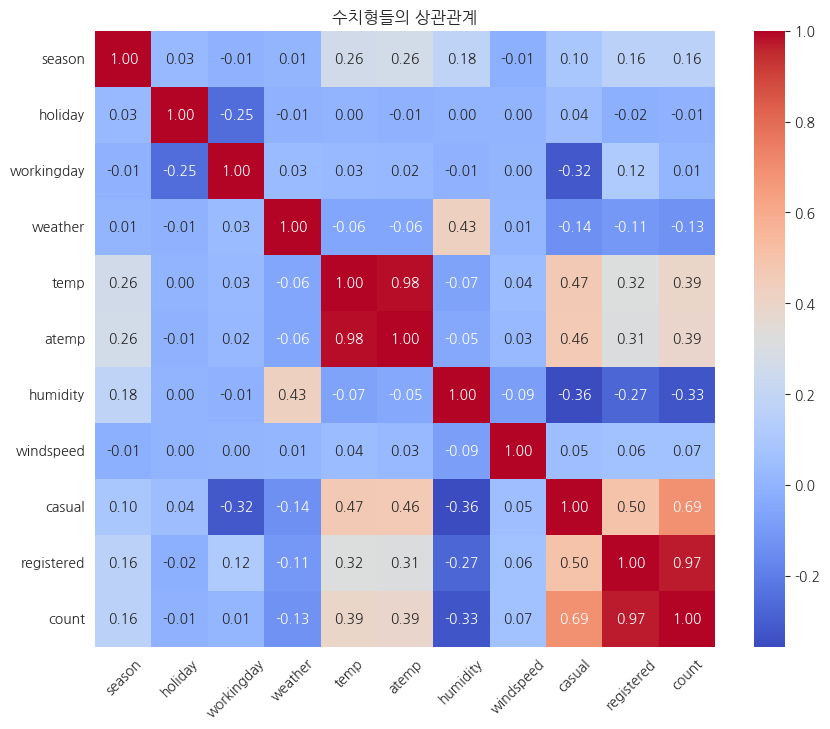

In [182]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

numeric_corr = numeric_df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(data = numeric_corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("수치형들의 상관관계")
plt.xticks(rotation = 45)
plt.show()
# 상관관계를 출력하는 별 의미가 없는듯 머신러닝할거면


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10886 non-null  datetime64[ns]
 1   season         10886 non-null  int64         
 2   holiday        10886 non-null  int64         
 3   workingday     10886 non-null  int64         
 4   weather        10886 non-null  int64         
 5   temp           10886 non-null  float64       
 6   atemp          10886 non-null  float64       
 7   humidity       10886 non-null  float64       
 8   windspeed      10886 non-null  float64       
 9   casual         10886 non-null  int64         
 10  registered     10886 non-null  int64         
 11  count          10886 non-null  int64         
 12  hour           10886 non-null  int32         
 13  month          10886 non-null  int32         
 14  day            10886 non-null  int32         
 15  weekday        1088

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
import numpy as np

# 정답이랑 필요없는 범주들 제거
y = df['count']
X = df.drop(columns=['count', 'registered', 'casual', 'datetime', 'temp_bins', 'atemp', 'holiday','humidity_bins'])

# 시간을 사인/코사인하면 점수가 더 올라간다고함'

# 🔹 hour를 사인/코사인으로 변환
X['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
X['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)


# 범주형, 순서형 원핫인코딩
category_cols = ['season', 'weather', 'workingday', 'weekday']
X = pd.get_dummies(X, columns=category_cols, drop_first=False, dtype=int)

X.head()

,temp,humidity,windspeed,hour,month,day,hour_sin,hour_cos,season_1,season_2,...,weather_4,workingday_0,workingday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,9.84,81.0,9.0,0,1,1,0.000000,1.000000,1,0,...,0,1,0,0,0,0,0,0,1,0
1,9.02,80.0,9.0,1,1,1,0.258819,0.965926,1,0,...,0,1,0,0,0,0,0,0,1,0
2,9.02,80.0,9.0,2,1,1,0.500000,0.866025,1,0,...,0,1,0,0,0,0,0,0,1,0
3,9.84,75.0,9.0,3,1,1,0.707107,0.707107,1,0,...,0,1,0,0,0,0,0,0,1,0
4,9.84,75.0,9.0,4,1,1,0.866025,0.500000,1,0,...,0,1,0,0,0,0,0,0,1,0


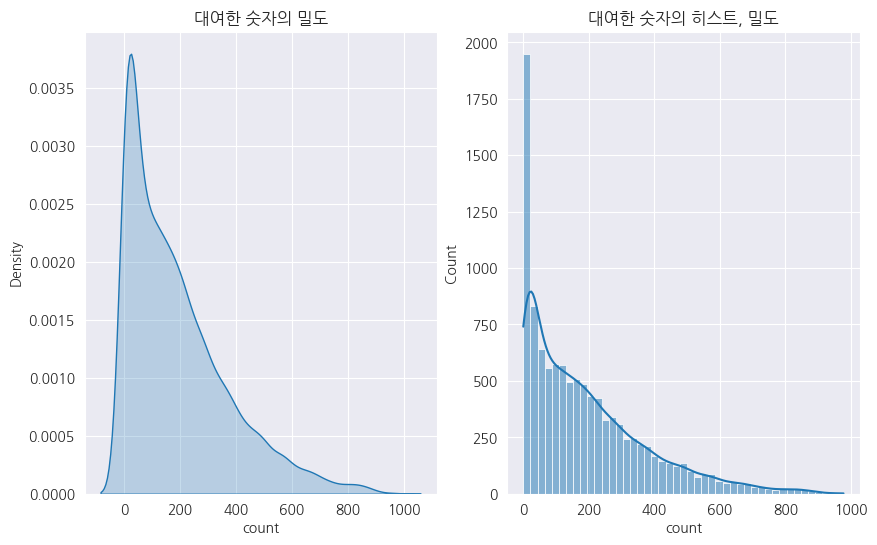

In [185]:
import seaborn as sns
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)

plt.title("대여한 숫자의 밀도")
sns.kdeplot(data = df, x = 'count', fill=True)

plt.subplot(1, 2, 2)
plt.title("대여한 숫자의 히스트, 밀도")
sns.histplot(data = df, x = 'count', kde = True)

plt.show()



## 카운트 로그화 시키랫음 왜지
카운트는 right skewed임
이걸 종모양으로 바꾸려고 로그화시킴


In [186]:
# 훈련/테스트 분리하기

y = np.log1p(df['count'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = False)

#  선형으로 학습 시키기
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 (RMSLE 안전장치: 음수 예측은 0으로 클리핑)
y_pred_log = model.predict(X_val)
# 음수인 경우 잘라내기, 자전거 수요가 -일 수는 없으니깐, 근데 예측이 왜 -가 나오지
# 선형회귀에서 그냥 값이 -면 나오는 거임, 실제가 0일때 -2개 이렇게 예측한 게 아니고
y_pred_log = np.clip(y_pred_log, 0, None)


# 원래 스케일로 되돌리기
y_pred = np.expm1(y_pred_log)


#  정답 출력
# under estimation에 큰 패널티 부여 !!!!!!

# 배달음식 30분 걸린다고 예측햇는데 20분이 걸리는건 용서가능
# 반대로 20분 걸린다고 했는데 30분 걸리면 욕 먹음
# 이럴 때 사용


# 그럼 대여 자전거 300개가 필요한데 200개라고 예측하면 사람들이 못 타니깐 rmsle사용ㅇㅇ
rmsle_lr = np.sqrt(mean_squared_log_error(np.expm1(y_val), y_pred))
print("리니어 리그레션 RMSLE:", rmsle_lr)

리니어 리그레션 RMSLE: 0.8859672173852996


In [187]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# 1. 다항 특징 확장 (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# 2. 표준화 (Standardization)
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)

# 3. 선형 회귀 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly_scaled, y_train)

# 4. 예측
y_pred_log = lin_reg.predict(X_val_poly_scaled)
y_pred_log = np.clip(y_pred_log, 0, None)
y_pred = np.expm1(y_pred_log)
rmse_poly = np.sqrt(mean_squared_log_error(np.expm1(y_val), y_pred))
print("다항 회귀:",rmse_poly)

다항 회귀: 0.6589595657467636


In [188]:
from sklearn.linear_model import Ridge

# y_train, y_val 는 log1p(count)로 학습/검증한다고 가정
ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", Ridge(alpha=1.0, random_state=42))
])

ridge.fit(X_train, y_train)
y_pred_log = ridge.predict(X_val)
# 음수 방지 & 로그 스케일 복원
y_pred_log = np.clip(y_pred_log, 0, None)
y_pred = np.expm1(y_pred_log)

rmsle_ridge = np.sqrt(mean_squared_log_error(np.expm1(y_val), y_pred))
print("Ridge RMSLE:", rmsle_ridge)

Ridge RMSLE: 0.8859680818380015


In [189]:
from sklearn.linear_model import Lasso

#라쏘 t를 높게 잡으면 다이아가 커지고, b가 커짐 -> 라쏘는 B를 0으로 만들어야 하는데 이에 반대됨.

# 알파가 t랑 반비례임. t가 크면 a가 작음. 다이아가 크게 가니깐 베타를 0으로 못 만듦 -> 약한규제임
# 이경우엔 0.001이 더 잘맞음

# 스케일링 시키고 라쏜느 해야됨
# B를 0으로 만드는데 큰 데이터는 b가 작으니깐 스케일 맞추기

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 훈련
lasso = Lasso(alpha=0.001, max_iter=100, random_state=42)
lasso.fit(X_train_scaled, y_train)
#예측값
y_pred_log = lasso.predict(X_val_scaled)


# 음수 방지 & 로그 스케일 복원
y_pred_log = np.clip(y_pred_log, 0, None)
y_pred = np.expm1(y_pred_log)


rmsle_lasso = np.sqrt(mean_squared_log_error(np.expm1(y_val), y_pred))
print("Lasso RMSLE:", rmsle_lasso)

Lasso RMSLE: 0.8861921032516565


In [190]:
from sklearn.linear_model import ElasticNet

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

elastic = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic.fit(X_train_scaled, y_train)

y_pred_log = elastic.predict(X_val_scaled)
# 음수 방지 & 로그 스케일 복원
y_pred_log = np.clip(y_pred_log, 0, None)
y_pred = np.expm1(y_pred_log)

rmsle_elastic = np.sqrt(mean_squared_log_error(np.expm1(y_val), y_pred))
print("엘라스틱 넷 RMSLE:", rmsle_elastic)

엘라스틱 넷 RMSLE: 0.8860830034822863


In [191]:
print("리니어 리그레션 RMSLE:", rmsle_lr)
print("다항 회귀 2차 RMSLE:", rmsle_poly)
print("Ridge RMSLE:", rmsle_ridge)
print("Lasso RMSLE:", rmsle_lasso)
print("엘라스틱) RMSLE:", rmsle_elastic)


리니어 리그레션 RMSLE: 0.8859672173852996
다항 회귀 2차 RMSLE: 0.5777382912296086
Ridge RMSLE: 0.8859680818380015
Lasso RMSLE: 0.8861921032516565
엘라스틱) RMSLE: 0.8860830034822863
